#                     Instituto Balseiro - Física Experimental II
#                       Implementación de un PLL en Pythonn

## Introducción:

Se conoce como Phase Locked Loop (PLL) o lazo de seguimiento de fase a un sistema de control capaz de generar una señal de salida que sigue a la de entrada en frecuencia y fase. Debido a sus características, el sistema permite obtener señales estables, sincronizar y demodular frecuencias. Estas propiedades hacen que sea usado frecuentemente en el área de las comunicaciones...

No se bien como meter una imagen local, sino habría que subirla a algún lado
![PLL_graph0.png](\Users\fmart\Desktop\Estudio\Balseiro\Experimental II\PLL)
<img src="/Users/fmart/Desktop/Estudio/Balseiro/Experimental II/PLL">

El esquema básico de un PLL puede verse en el diagrama de bloques de la figura 1. Este consta de las siguientes etapas:<br>
    1) El ***detector de fases*** genera una señal con una componente continua proporcional a la diferencia de fase $\Delta \phi$ entre la entrada y la salida del VCO. El mismo puede ser implementado de distintas maneras, como con un multiplicador de cuatro cuadrantes o uno con lógica XOR.<br>
    2) La señal de salida del detector es luego filtrada por un ***filtro pasa bajos*** para atenuar la componente alterna y obtener una señal lo más continua posible. El mismo, similar al detector de fases, puede ser implementado de distintas maneras. En particular para esta experiencia, se utilizó un RC y un Lead-lag activo,<br>
    3) La señal continua filtrada, la cual es proporcional a $\Delta \phi$, ingresa al ***VCO*** (oscilador controlado por voltaje). El cual genera una señal periódica cuya frecuencia es  proporcional a la tensión (desfasaje) que recibe. Luego se termina la iteración del ciclo cuando la salida del VCO va a parar al detector de fase para continuar con la retroalimentación.<br>



## Fuente de Señal

Para simular el comportamiento del PLL, se necesita en primer lugar generar la señal de entrada al
PLL, xr(t). Esta señal será una señal sinusoidal de una determinada frecuencia, y con una
fase inicial establecida.

***Ejercicio 1.*** Construir una función en Python que genere N muestras de la señal de entrada al
PLL: ***fuente***(f0, Ts, fase inicial, N). Donde f0 es la frecuencia de la señal, Ts es el período entre
muestras (período de muestreo), fase inicial es la fase inicial de la señal, y N es el número total de
muestras de la señal a generar.

In [28]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,fftfreq,fftshift


# Se definen además una función plotS para graficar, TF para realizar la FFT y dc para simular una señal continua.

def fuente(f0, Ts, fi, N):  # fi -> fase inicial
    a = np.linspace(0.0, N*Ts, N)  # Returns evenly spaced numbers over an interval. (Start, end, deltax)
    s = np.sin(2*a*np.pi*f0+fi) # sin(array())=array(sin()), yup
    return a,s

def plotS(a,s):
    plt.scatter(a, s, np.pi*3, '0', alpha=0.5)  # scatterplot -> plots 2D values as points
    # (x,y,tamaño de marcador,RGB(c)[Hexa], alpha ->transparencia de los ptos )
    plt.title('Señal')
    plt.xlabel('t')
    plt.ylabel('V')
    plt.show()
    
def TF(N,Ts,x,graph=False):  # x array, N num de muestras
    F = fft(x)  # Devuelve el array transformado
    f = fftfreq(N,Ts)  # Devuelve las freq con espaciado Ts
    f = fftshift(f)  # pone la segunda mitad del array adelante de la primera
    if(graph==True):
        Fplot=fftshift(F)
        plt.plot(f, 1.0/N * np.abs(Fplot))  # el abs le hace abs a c/ elem
        plt.grid()  # crea el grid 
        plt.show()
    return F

def dc(V, Ts, N):
    a = np.linspace(0.0, N*Ts, N)
    s=np.full(N,V)  # array lleno de V
    return a,s




***Ejercicio 2.*** Utilizando la función construida representar la señal de entrada al PLL para N = 1000
muestras, f0 = 1 kHz, fase inicial = π/2, y período de muestreo: Ts = 1/(100f0).
Con la función construida podemos fácilmente generar una señal de entrada al PLL con un salto
de fase en un instante temporal determinado

<IPython.core.display.Javascript object>


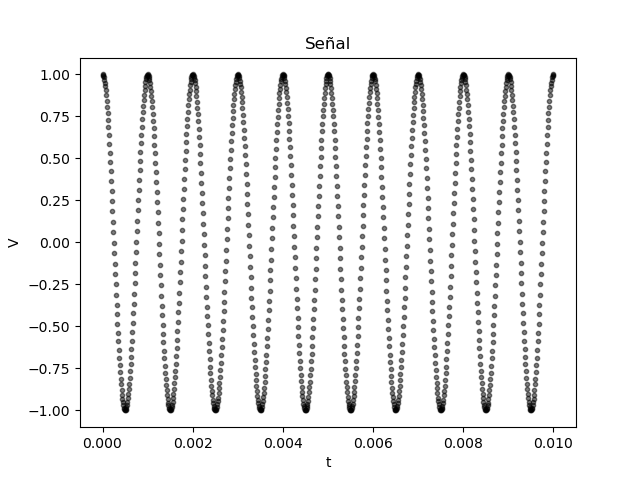

In [11]:
N=1000
f0=1000
Ts=1/(100*f0)
fi=np.pi/2

%matplotlib notebook
a, s = fuente(f0,Ts,fi,N) 
plotS(a,s)

***Ejercicio 3.*** Utilizando la función construida representar la señal de entrada al PLL en las mismas
condiciones anteriores, pero introduciendo un salto de fase de valor π en la muestra: N/2.

<IPython.core.display.Javascript object>


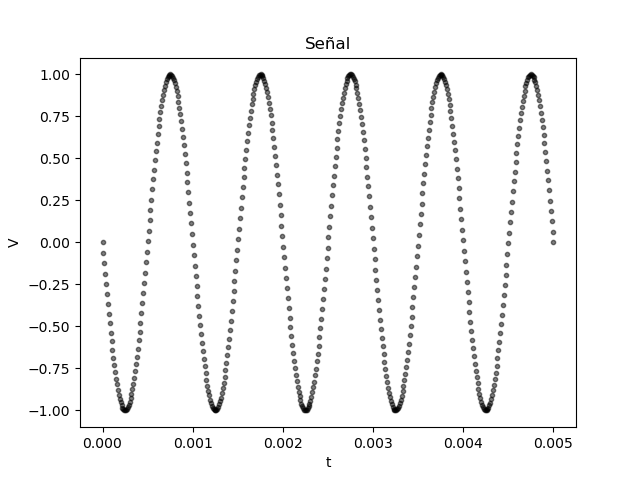

In [12]:
N=500
f0=1000
Ts=1/(100*f0)
fi=np.pi

%matplotlib notebook
a, s = fuente(f0,Ts,fi,N) 
plotS(a,s)

## Detector de fases

Para simular el detector de fases se utilizó en primer lugar el tipo de detector más fácil, es decir, un multiplicador de señal ideal:

***Ejercicio 4.*** Construya una función en Python que implemente el detector de fases entre una
muestra temporal de la señal de entrada $x_r$ y una muestra temporal de la señal del VCO ($x_v = x_{VCO}$):
***detector***($x_r, x_v$).

In [22]:
def detector(xr, xv):
    xs = xr * xv
    return xs

***Ejercicio 5.*** Usando las funciones anteriores construya dos señales de frecuencia ($f_0$ = 1 kHz), una
con fase inicial cero y la otra con fase inicial (π/4). Pasar las dos señales por el detector de fases.
Tenga en cuenta que debe pasar el detector muestra a muestra con un bucle temporal. Representar la
señal resultante en tiempo y frecuencia. Comentar el resultado obtenido. Interpretar el significado de
la componente continua obtenida.

<IPython.core.display.Javascript object>


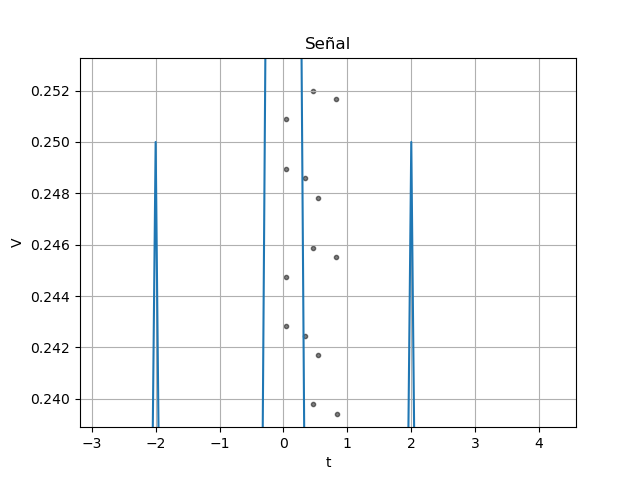

In [43]:
f0 = 1000
Ts = 1/ (1 * f0)
fi = np.pi / 2
N = 1000

t, s1 = fuente(f0, Ts, 0, N)

t2, s2 = fuente(f0, Ts, np.pi / 4, N)  # desfase pi/4

xo = []
for i in range(N):
    xo = np.append(xo, detector(s1[i],s2[i]))
%matplotlib notebook
F=TF(N,Ts,xo,graph=True)


plotS(t, s1)
plotS(t, xo)




***Ejercicio 6.*** Repetir el ejercicio con dos señales, una con fase inicial cero y la otra con fase inicial
(π/2). ¿Qué fase detecta el detector de fase en este caso?. Comentar los resultados obtenidos.

In [ ]:
a3, s3 = fuente(f0, Ts, np.pi / 2, N)  # desfase pi/2

## Filtro

## VCO

## PLL